# Tutorial Exercises: $t$-test 

Here are some exercises on comparing means using the t-test

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [3]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

## 1. Whose peaches are heavier?

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/peaches.png" width=30% alt="There should be a picture of some peaches here" >

As last week:

Mr Robinson’s juice factory buys peaches from farmers by the tray. Each tray contains 50 peaches. Farmer MacDonald claims that this is unfair as his peaches are juicier and therefore weigh more than the peaches of his rival, Mr McGregor. 

Mr Robinson weighs eight trays of Farmer McDonald’s peaches and 8 trays of Mr McGregor’s peaches. 
The weights, in kilograms are given in the file peaches.csv 

Investigate whether MacDonald's claim is justified by testing for a difference in weight between MacDonald and McGregor's peaches. Use both a parametric and non-parametric test.

a) Load the data into a Pandas dataframe

In [4]:
peaches = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/peaches.csv')
peaches

,McGregor,MacDonald
0,7.867,8.289
1,7.637,7.972
2,7.652,8.237
3,7.772,7.789
4,7.510,7.345
5,7.743,7.861
6,7.356,7.779
7,7.944,7.974


b) Plot the data and comment on whether they are noramlly distributed. 

A KDE plot (to show the distribution) and rug plot (to show individual data points) would be a good choice here. You should comment on whether the data appear to be Normally distriubted and hence the suitability of the t-test. 

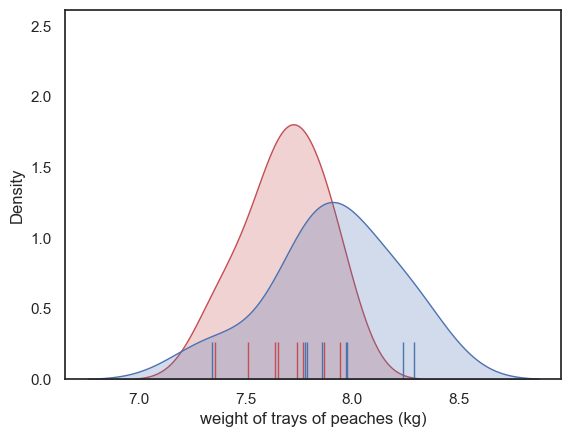

In [29]:
# your code here to plot the data
sns.kdeplot(data=peaches.McGregor, color='r', fill=True)
sns.rugplot(x=peaches.McGregor, color='r', height=0.1)
sns.kdeplot(data=peaches.MacDonald, color='b', fill=True)
sns.rugplot(x=peaches.MacDonald, color='b', height=0.1)
plt.xlabel('weight of trays of peaches (kg)')
plt.show()

d) We can assume (based on the Central Limit Theorem) that these data points are normally distributed. Explain why.

<font color='red'> Each tray contains 50 peaches. The weight of the total tray is 50x the weight of the mean peach in the tray. But the mean of a large sample (n=50) is normally distributed, according to the Central Limit Theorem. So the total weight, as 50x the mean weight, should also be normally distributed.</font>

e) Conduct a t-test to test Farmer MacDonald's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the built in function from `scipy.stats` with appropriate option choices
* State your conclusions

<font color='red'>**Hypotheses:**

* <font color='red'> Ho: The mean weight of trays of peaches is the same for Farmer MacDonald and Farmer McGregor's farms
* <font color='red'> Ha: The mean weight is higher for Farmer McDonald's farm

<font color='red'>We will test at the 5% alpha level, one-tailed.

<font color='red'>*Notes* 
* <font color='red'> In this case, we are testing for a difference of *means* not medians, since the maths of the t-test concerns variability in the sample mean

<font color='red'>**Descriptive Statistics**

<font color='red'>We need to report the mean, sample size, and a measure of spread for each group. Here we can use `df.agg()` to get the mean and standard deviation.
</font>

In [ ]:
peaches.agg({'McGregor':['mean', 'std', 'count'], 'MacDonald':['mean', 'std', 'count']})

<font color='red'>Farmer MacDonald's trays of peaches (n=8, mean = 7.91kg, sd=0.30) are slightly heavier than Farmer McGregor's (n=8, mean = 7.70kg, sd=0.19)</font>

<font color='red'>**Carry out the test**

<font color='red'>Note that you must choose the correct option for `alternative`

In [6]:
stats.ttest_ind(peaches.MacDonald, peaches.McGregor, alternative='greater')

Ttest_indResult(statistic=1.7749776811588107, pvalue=0.04881876713074563)

<font color='red'> As the p-value is (just!) less than the chosen alpha value (0.05), we reject the null hypothesis.

<font color='red'> **Conclusions**

<font color='red'> The trays of peaches from Farmer MacDonald are heavier

f) Look back at the rank-based and permutation tests we carried out on the same data in the previous section. How do the results of the three tests differ? Which test was the best choice, and why?

<font color='red'> All three tests gave a significant difference such that Farmer MacDonald's peaches were heavier, but the p-value varied slightly. As it happens the rank-based test has the 'most significant' p value even though this is the least sensitive test. 

<font color='red'> All three tests are appropriate as the assumptions for all three tests are met. I woudl choose the t-test as it is theoretically the most sensitive, given that that the criteria are indeed met.

<font color='red'> What you should *not* do in your own research is try all the available tests and pick the one with the lowest p-value

## 2. IQ and vitamins

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/vitamins.jpg" width=50% alt="There should be a picture of some vitamin pills here" >

The VitalVit company claim that after taking their VitalVit supplement, IQ is increased. 

They run a trial in which 22 participants complete a baseline IQ test, then take VitalVit for six weeks, then complete another IQ test.


a) Load the data into a Pandas dataframe

In [8]:
vitamin = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2025/main/data/vitalVit.csv')
vitamin

,ID_code,before,after
0,688870,82.596,83.437
1,723650,117.200,119.810
2,445960,85.861,83.976
3,708780,125.640,127.680
4,109960,96.751,99.103
5,968530,105.680,106.890
6,164930,142.410,145.550
7,744410,109.650,109.320
8,499380,128.210,125.110
9,290560,84.773,87.249


b) The requirement for a paired t-test is that the pairwise differences in scores are normally distributed. Plot the data in such a way as to check this assumption. Comment on your plot.

* A KDE plot of the pairwise differences, after-before, would be a good choice here

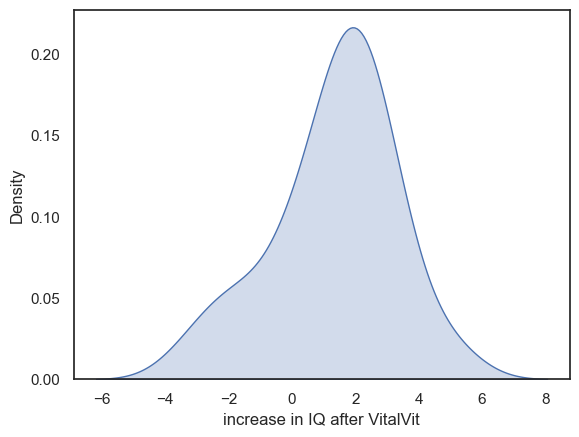

In [12]:
vitamin['change']=vitamin.after-vitamin.before

sns.kdeplot(data=vitamin.change, fill=True)
plt.xlabel('increase in IQ after VitalVit')
plt.show()

<font color='red'> The change in IQ could be normally distributed - it is unimodal and fairly symmetrical, although with neagutive skew and heavy tails

<font color='red'> There seem to be more people showing positive than negative changes

In real IQ tests, IQ scores are normally distributed by design (the tests are designed to yeild a normal distribution of scores). Therefore we should be able to use a t-test to compare the scores from before and after taking VitalVit.

c) Conduct a t-test to test VitalVit's claim

* State your hypotheses
* State relevant descriptive statistics
* Carry out the test using the biilt in function from <tt>scipy.stats</tt> with appropriate option choices
* State your conclusions

<font color='red'>**Hypotheses:**

* <font color='red'> Ho: The mean change in IQ after taking VitalVit is zero 
* <font color='red'> Ha: The mean change in IQ is positive

<font color='red'> We will test at the 5% alpha level, one-tailed.

<font color='red'>*Notes* 
* <font color='red'> The hypotheses concern the mean change in IQ as the maths of the t-test concerns variation in the mean
* <font color='red'> We are testing the mean *change* in IQ (within subjects) rather than the difference of means (between the before- and after- datasets) as this is a paired test.
* <font color='red'> The alternative hypothesis is *directional* as VitalVit is supposed to increase IQ, not decrease it. This means we need to choose a one-tailed test and choose the correct value of `alternative` when we run the test

<font color='red'>**Descriptive Statistics**
* <font color='red'>We need to report the mean difference, sample size (number of pairs), and a measure of spread for the differences (sd). 
* <font color='red'> I would advise also reporting these statistics for each session (before/after) as this gives the reader a fuller picture of the data (are the changes in IQ score within individuals large, compared to the variation between individuals)

</font>

In [13]:
vitamin.agg({'before':['mean', 'std', 'count'], 'after':['mean', 'std', 'count'] , 'change':['mean', 'std', 'count']})

,before,after,change
mean,100.963409,102.284000,1.320591
std,15.815174,15.714324,1.907622
count,22.000000,22.000000,22.000000


<font color='red'> The mean change in IQ is positive (n=22, mean(after-before) = 1.32, sd=1.91). The change is small compared to the mean value for IQ in each group (before: mean=101.0, sd=15.8. after: mean = 102.3, sd=15.7) </font>

<font color='red'>**Carry out the test**

<font color='red'>Note that you must choose the correct option for `alternative`, bearing in mind that the order in which you input the data also matters. 

In [14]:
stats.ttest_rel(vitamin.after, vitamin.before, alternative='greater')


TtestResult(statistic=3.247037547947646, pvalue=0.0019289530228459733, df=21)

<font color='red'> As the p-value is less than the chosen alpha value (0.05), we reject the null hypothesis.

<font color='red'> **Conclusions**

<font color='red'> VitalVit does indeed increase IQ

f) Look back to the rank-based and permutation tests on the same data, which you carried out last week. How do the results differ? Why test was the best choice, and why?

<font color='red'> All three tests find a significant increase in IQ after taking VitalVit.

<font color='red'> In this case the t-test had the 'most significant' p-value

<font color='red'> Since we know the t-test should be the most sensitive (as its assumptions are fulfilled, this is probably the one we should ave chosen in the first place</font>

## 3. Who has the tallest students?

A student from Lonsdale college claims that Lonsdale students are taller than students from Beaufort college.

Heights of 30 randomly selected male undergraduates from each college are found in the file heightsCollege.csv

Test the student's hypothesis using a t-test (this is justified as heights are generally normally distributed) and write up your report as if for a scientific publication. Your report should include the following elements:

* A plot of the data to show the data distribution
* The relevant descriptive statistics
* The results of the t-test
* A conclusion


You can use the write-up sections of the t-test example notebooks as a model

In [17]:
# Load the data
heights = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2025/main/data/heightsCollege.csv')

<font color='red'> Heights were recorded for 30 male undergraduates in each of two Oxford colleges (Lonsdale and Beaufort)

<font color='red'> The data within each college have a unimodal and roughly symmetrical distribution consistent with the expected Normal distribution for height. There are three very tall students at Lonsdale creating a heavy positive tail in that distribution:

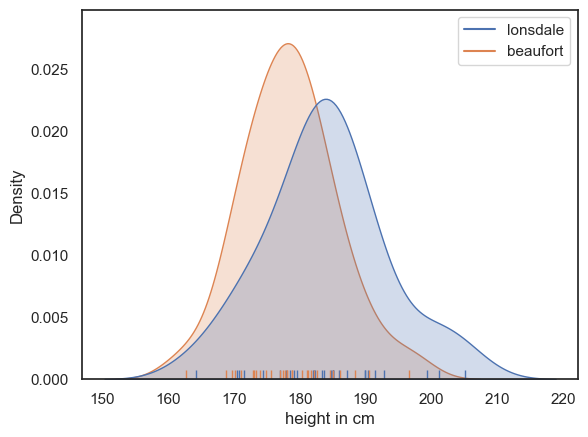

In [21]:
sns.kdeplot(heights, fill=True)
sns.rugplot(heights)
plt.xlabel('height in cm')
plt.show()

<font color='red'> **Descriptive Statistics**

In [24]:
heights.agg({'lonsdale':['mean', 'std', 'count'], 'beaufort':['mean', 'std', 'count']})

,lonsdale,beaufort
mean,183.863667,178.440000
std,9.099884,7.066874
count,30.000000,30.000000


<font color='red'> The mean height is greater at Lonsdale (mean = 183.9cm, sd=9.09) than Beaufort (mean = 178.4cm, sd=7.07)

<font color = 'red'> We carried out an independent samples t-test ...

In [27]:
stats.ttest_ind(heights.lonsdale, heights.beaufort, alternative='two-sided')

Ttest_indResult(statistic=2.5783308721106657, pvalue=0.012488916322958012)

<font color='red'> ... which showed a significant difference in height between the colleges (t(58) = 2.58, p=0.012, two-tailed) at the 5% level. 

<font color='red'> We conclude that there is indeed a significant difference in mean height between colleges, with men at Lonsdale being taller.